In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv('diabetes_data_upload.csv')
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [3]:
dataset.replace(to_replace=dict(No=0, Yes=1), inplace=True)
dataset.replace(to_replace=dict(Negative=0, Positive=1), inplace=True)
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [4]:
dataset = dataset.rename(columns={"Genital thrush": "Genital_thrush"})
dataset

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital_thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
dataset[['Age']] = minmax.fit_transform(dataset[['Age']])
dataset[['Age']] = minmax.transform(dataset[['Age']])

In [6]:
# Importing dataset
data = pd.read_csv('diabetes_dataset__2019.csv')
data

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [7]:
data.isnull().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [8]:
data['RegularMedicine'].replace('o','no', inplace=True)
data['BPLevel'] = data['BPLevel'].str.lower().str.strip()
data['Pdiabetes'].replace('0', 'no', inplace=True)
data['Diabetic'] = data['Diabetic'].str.strip()
# there is nan value at pregancies column where gender is male 
# if these values are replaced with 0, there's only 26 values, so all nan values will be replaced with 0. 
data[data['Gender']=='Male']['Pregancies'].isna().sum()

16

In [9]:
data['Pregancies'].replace(np.nan, 0, inplace=True)
# will drop all na's 
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               947 non-null    object 
 1   Gender            947 non-null    object 
 2   Family_Diabetes   947 non-null    object 
 3   highBP            947 non-null    object 
 4   PhysicallyActive  947 non-null    object 
 5   BMI               947 non-null    float64
 6   Smoking           947 non-null    object 
 7   Alcohol           947 non-null    object 
 8   Sleep             947 non-null    int64  
 9   SoundSleep        947 non-null    int64  
 10  RegularMedicine   947 non-null    object 
 11  JunkFood          947 non-null    object 
 12  Stress            947 non-null    object 
 13  BPLevel           947 non-null    object 
 14  Pregancies        947 non-null    float64
 15  Pdiabetes         947 non-null    object 
 16  UriationFreq      947 non-null    object 
 1

In [10]:
data.isnull().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

In [11]:
num_cols = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']
category_cols = list(set(data.columns).difference(set(num_cols)))

In [12]:

data_clean = pd.DataFrame()
for col in num_cols: 
    data_clean[col] = data[col].astype('int')

In [13]:

for col in category_cols: 
    data_clean[col] = data[col].astype('category')

In [14]:
# categorical variables in pandas is a little tricky. 
# I want to order the categorical variables according to the risks. 
data_clean['Age'] = pd.Categorical(data['Age'], ordered=True, 
                                   categories=['less than 40', '40-49', '50-59', '60 or older'])
data_clean['PhysicallyActive'] = pd.Categorical(data['PhysicallyActive'], ordered=True, 
                                                categories=['one hr or more', 'more than half an hr', 'less than half an hr', 'none'])
data_clean['JunkFood'] = pd.Categorical(data['JunkFood'], ordered=True, categories=['occasionally', 'often', 'very often', 'always'])
data_clean['BPLevel'] = pd.Categorical(data['BPLevel'], ordered=True, 
                                       categories=['low', 'normal', 'high'])
data_clean['Stress'] = pd.Categorical(data['Stress'], ordered=True, 
                                      categories=['not at all', 'sometimes', 'very often', 'always'])

In [15]:

# sklearn cannot map according to this order and so do it manually. 
category_mapping = {
    'Age':{'less than 40':0, '40-49':1, '50-59':2, '60 or older':3},
    'Family_Diabetes':{'no':0, 'yes':1},
    'Gender':{'Female':0, 'Male':1},
    'Smoking':{'no':0, 'yes':1},
    'Pdiabetes':{'no':0, 'yes':1},
    'RegularMedicine':{'no':0, 'yes':1},
    'PhysicallyActive':{'one hr or more':0, 'more than half an hr':1, 'less than half an hr':2, 'none':3},
    'JunkFood':{'occasionally':0, 'often':1, 'very often':2, 'always':3},
    'BPLevel':{'low':0, 'normal':1, 'high':2},
    'highBP':{'no':0, 'yes':1},
    'Alcohol':{'no':0, 'yes':1},
    'UriationFreq':{'not much':0, 'quite often':1},
    'Stress':{'not at all':0, 'sometimes':1, 'very often':2, 'always':3},
    'Diabetic':{'no':0, 'yes':1},
}

In [16]:
for col in category_cols:
    data_clean[col] = data_clean[col].map(category_mapping[col])

In [17]:
data_clean

,BMI,Sleep,SoundSleep,Pregancies,highBP,PhysicallyActive,Alcohol,RegularMedicine,Gender,BPLevel,Family_Diabetes,UriationFreq,Smoking,JunkFood,Diabetic,Stress,Age,Pdiabetes
0,39,8,6,0,1,0,0,0,1,2,0,0,0,0,0,1,2,0
1,28,8,6,0,1,2,0,1,1,1,0,0,0,2,0,1,2,0
2,24,6,6,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
3,23,8,6,0,0,0,0,0,1,1,0,0,0,0,0,1,2,0
4,27,8,8,0,0,2,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25,8,6,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0
948,27,6,5,0,1,1,0,1,1,2,1,1,0,0,1,1,3,0
949,23,6,5,0,1,3,0,1,1,2,0,0,0,0,0,1,3,0
950,27,6,5,0,1,2,1,1,1,2,0,0,0,0,0,2,3,0


In [18]:
data_2 = data_clean

In [19]:
data_2=data_clean.rename(columns={"Diabetic":"class"})
data_2

,BMI,Sleep,SoundSleep,Pregancies,highBP,PhysicallyActive,Alcohol,RegularMedicine,Gender,BPLevel,Family_Diabetes,UriationFreq,Smoking,JunkFood,class,Stress,Age,Pdiabetes
0,39,8,6,0,1,0,0,0,1,2,0,0,0,0,0,1,2,0
1,28,8,6,0,1,2,0,1,1,1,0,0,0,2,0,1,2,0
2,24,6,6,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0
3,23,8,6,0,0,0,0,0,1,1,0,0,0,0,0,1,2,0
4,27,8,8,0,0,2,0,0,1,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25,8,6,0,0,1,0,0,1,1,1,0,0,1,1,1,0,0
948,27,6,5,0,1,1,0,1,1,2,1,1,0,0,1,1,3,0
949,23,6,5,0,1,3,0,1,1,2,0,0,0,0,0,1,3,0
950,27,6,5,0,1,2,1,1,1,2,0,0,0,0,0,2,3,0


<AxesSubplot:xlabel='class', ylabel='count'>

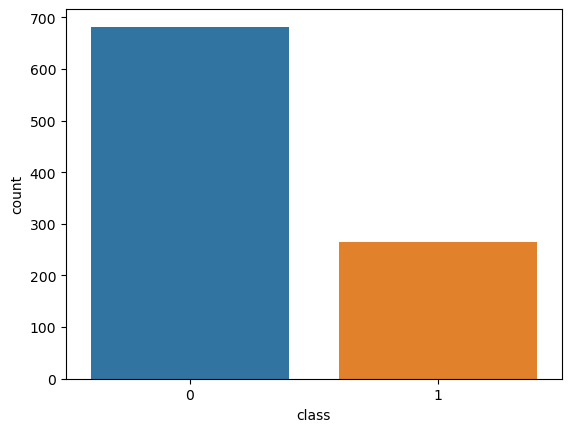

In [20]:
sns.countplot(x ='class', data = data_2)

In [21]:
print("Total diabetic patient:" , data_2['class'].value_counts()[1])
print("Total non-diabetic patient:" , data_2['class'].value_counts()[0])

Total diabetic patient: 265
Total non-diabetic patient: 682


In [22]:
data_2.dtypes

BMI                    int32
Sleep                  int32
SoundSleep             int32
Pregancies             int32
highBP              category
PhysicallyActive    category
Alcohol             category
RegularMedicine     category
Gender              category
BPLevel             category
Family_Diabetes     category
UriationFreq        category
Smoking             category
JunkFood            category
class               category
Stress              category
Age                 category
Pdiabetes           category
dtype: object

In [23]:
# using merge function by setting how='outer'
df = pd.merge(dataset, data_2,on='class')

In [24]:
df

,Age_x,Gender_x,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital_thrush,visual blurring,Itching,...,RegularMedicine,Gender_y,BPLevel,Family_Diabetes,UriationFreq,Smoking,JunkFood,Stress,Age_y,Pdiabetes
0,-0.211833,Male,0,1,0,1,0,0,0,1,...,0,1,2,0,0,0,0,1,1,0
1,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,0,1,1,1,0,1,3,0,0
2,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,0,1,1,0,0,1,3,0,0
3,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,0,1,0,1,0,0,1,3,0
4,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,1,2,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221195,-0.211468,Male,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,1,1,0
221196,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
221197,-0.211468,Male,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
221198,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,0,1,3,0


In [25]:
# shift column 'Name' tolast position
last_column = df.pop('class')
  
# insert column using insert(position,column_name, first_column) function
df.insert(33, 'class', last_column)

# print data
df

,Age_x,Gender_x,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital_thrush,visual blurring,Itching,...,Gender_y,BPLevel,Family_Diabetes,UriationFreq,Smoking,JunkFood,Stress,Age_y,Pdiabetes,class
0,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,2,0,0,0,0,1,1,0,1
1,-0.211833,Male,0,1,0,1,0,0,0,1,...,0,1,1,1,0,1,3,0,0,1
2,-0.211833,Male,0,1,0,1,0,0,0,1,...,0,1,1,0,0,1,3,0,0,1
3,-0.211833,Male,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,1,3,0,1
4,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,2,0,0,0,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221195,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,0,0
221196,-0.211468,Male,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
221197,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
221198,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,1,3,0,0


In [26]:
df.isnull().sum()

Age_x                 0
Gender_x              0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital_thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
BMI                   0
Sleep                 0
SoundSleep            0
Pregancies            0
highBP                0
PhysicallyActive      0
Alcohol               0
RegularMedicine       0
Gender_y              0
BPLevel               0
Family_Diabetes       0
UriationFreq          0
Smoking               0
JunkFood              0
Stress                0
Age_y                 0
Pdiabetes             0
class                 0
dtype: int64

In [27]:
df.describe()

,Age_x,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital_thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,BMI,Sleep,SoundSleep,Pregancies
count,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000,221200.000000
mean,-0.210482,0.337364,0.294218,0.314638,0.529403,0.374417,0.201180,0.388476,0.489729,0.181112,0.448449,0.328680,0.346722,0.404846,0.156325,25.924412,6.934177,5.500000,0.417902
std,0.002216,0.472811,0.455691,0.464373,0.499136,0.483973,0.400883,0.487405,0.499896,0.385112,0.497337,0.469734,0.475928,0.490863,0.363164,5.406164,1.295009,1.879199,0.949660
min,-0.216216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,0.000000
25%,-0.212199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,6.000000,4.000000,0.000000
50%,-0.210555,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,7.000000,6.000000,0.000000
75%,-0.208912,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,29.000000,8.000000,7.000000,0.000000
max,-0.202703,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,11.000000,11.000000,4.000000


In [28]:
df.dtypes

Age_x                  float64
Gender_x                object
Polyuria                 int64
Polydipsia               int64
sudden weight loss       int64
weakness                 int64
Polyphagia               int64
Genital_thrush           int64
visual blurring          int64
Itching                  int64
Irritability             int64
delayed healing          int64
partial paresis          int64
muscle stiffness         int64
Alopecia                 int64
Obesity                  int64
BMI                      int32
Sleep                    int32
SoundSleep               int32
Pregancies               int32
highBP                category
PhysicallyActive      category
Alcohol               category
RegularMedicine       category
Gender_y              category
BPLevel               category
Family_Diabetes       category
UriationFreq          category
Smoking               category
JunkFood              category
Stress                category
Age_y                 category
Pdiabete

<AxesSubplot:xlabel='class', ylabel='count'>

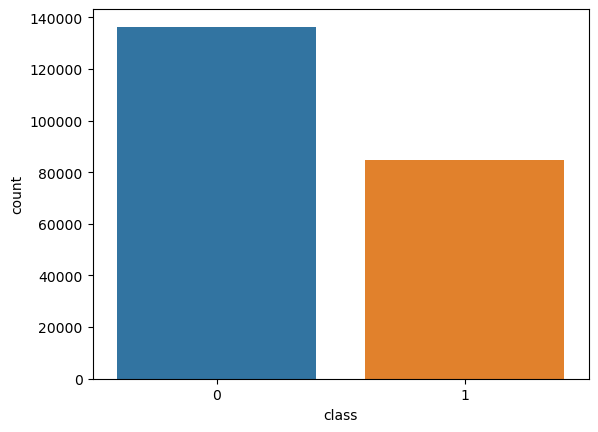

In [29]:
sns.countplot(x ='class', data = df)

# 0 = not diabetic
# 1 = diabetic

In [30]:
print("Total diabetic patient after merge:" , df['class'].value_counts()[1])
print("Total non-diabetic patient after merge:" , df['class'].value_counts()[0])

Total diabetic patient after merge: 84800
Total non-diabetic patient after merge: 136400


<AxesSubplot:>

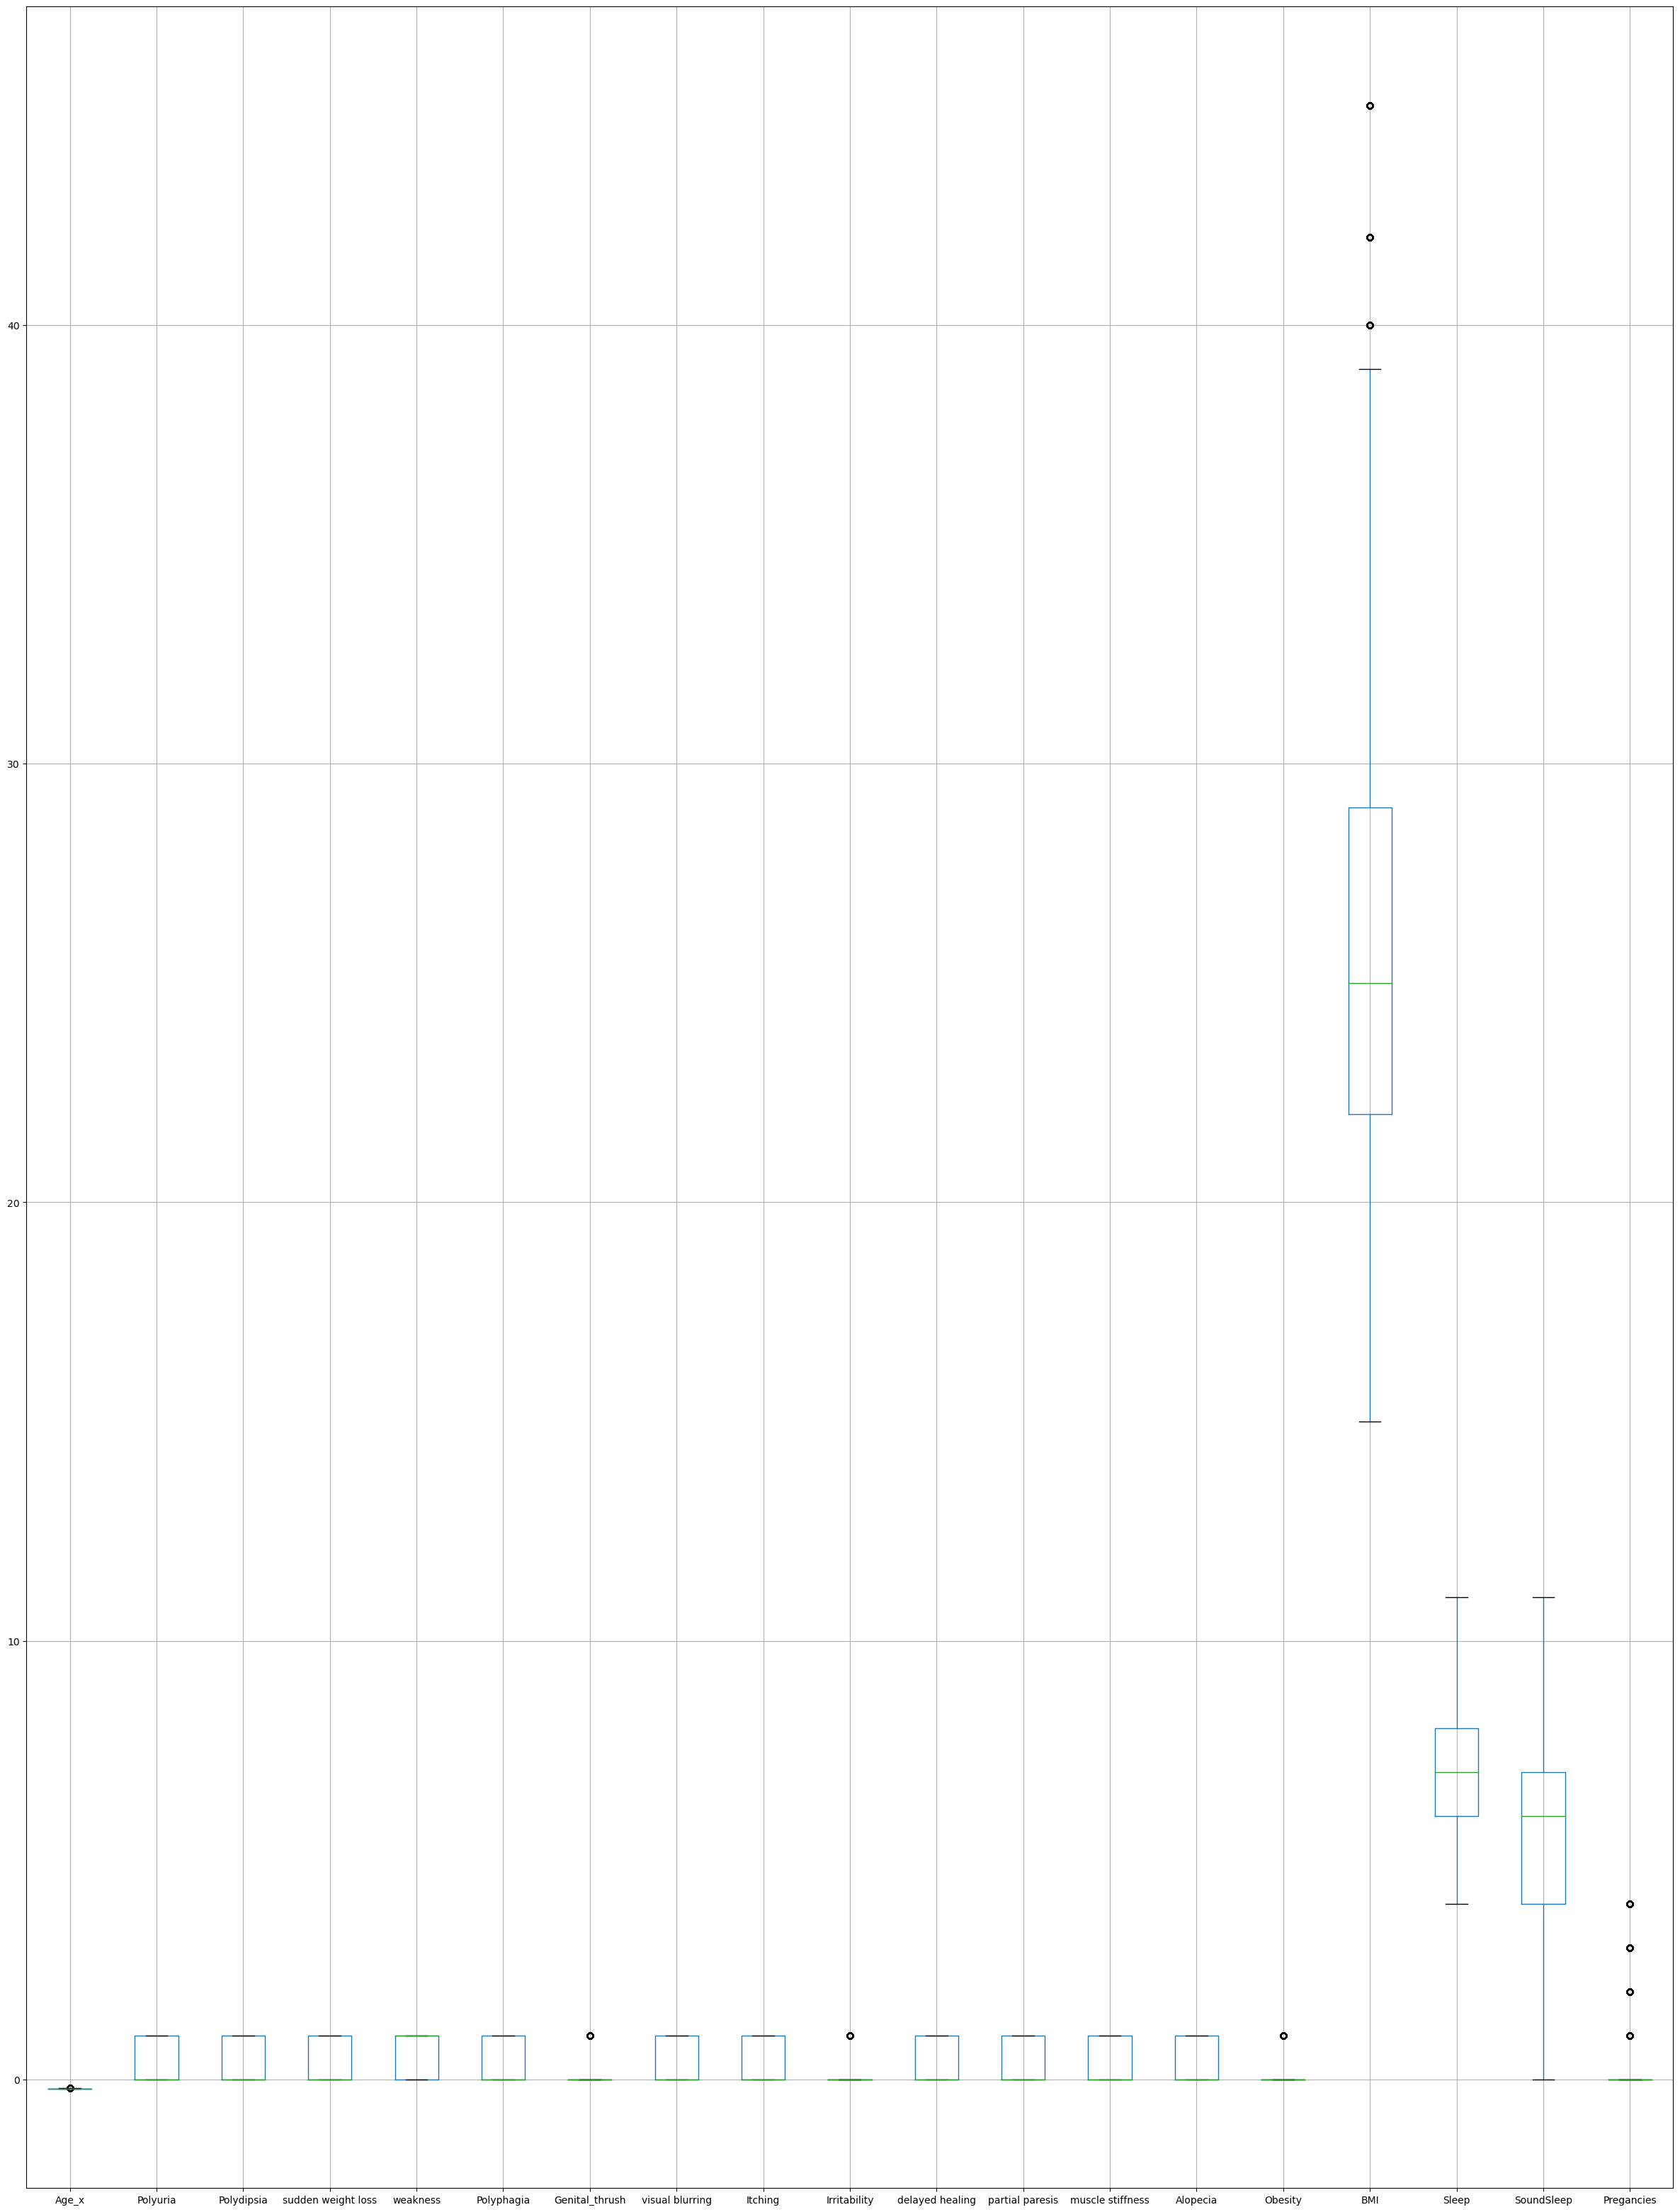

In [31]:
df.boxplot(figsize=(30,40))

array([[<AxesSubplot:title={'center':'Age_x'}>,
        <AxesSubplot:title={'center':'Polyuria'}>,
        <AxesSubplot:title={'center':'Polydipsia'}>,
        <AxesSubplot:title={'center':'sudden weight loss'}>],
       [<AxesSubplot:title={'center':'weakness'}>,
        <AxesSubplot:title={'center':'Polyphagia'}>,
        <AxesSubplot:title={'center':'Genital_thrush'}>,
        <AxesSubplot:title={'center':'visual blurring'}>],
       [<AxesSubplot:title={'center':'Itching'}>,
        <AxesSubplot:title={'center':'Irritability'}>,
        <AxesSubplot:title={'center':'delayed healing'}>,
        <AxesSubplot:title={'center':'partial paresis'}>],
       [<AxesSubplot:title={'center':'muscle stiffness'}>,
        <AxesSubplot:title={'center':'Alopecia'}>,
        <AxesSubplot:title={'center':'Obesity'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'Sleep'}>,
        <AxesSubplot:title={'center':'SoundSleep'}>,
        <AxesSubplot:title={'center'

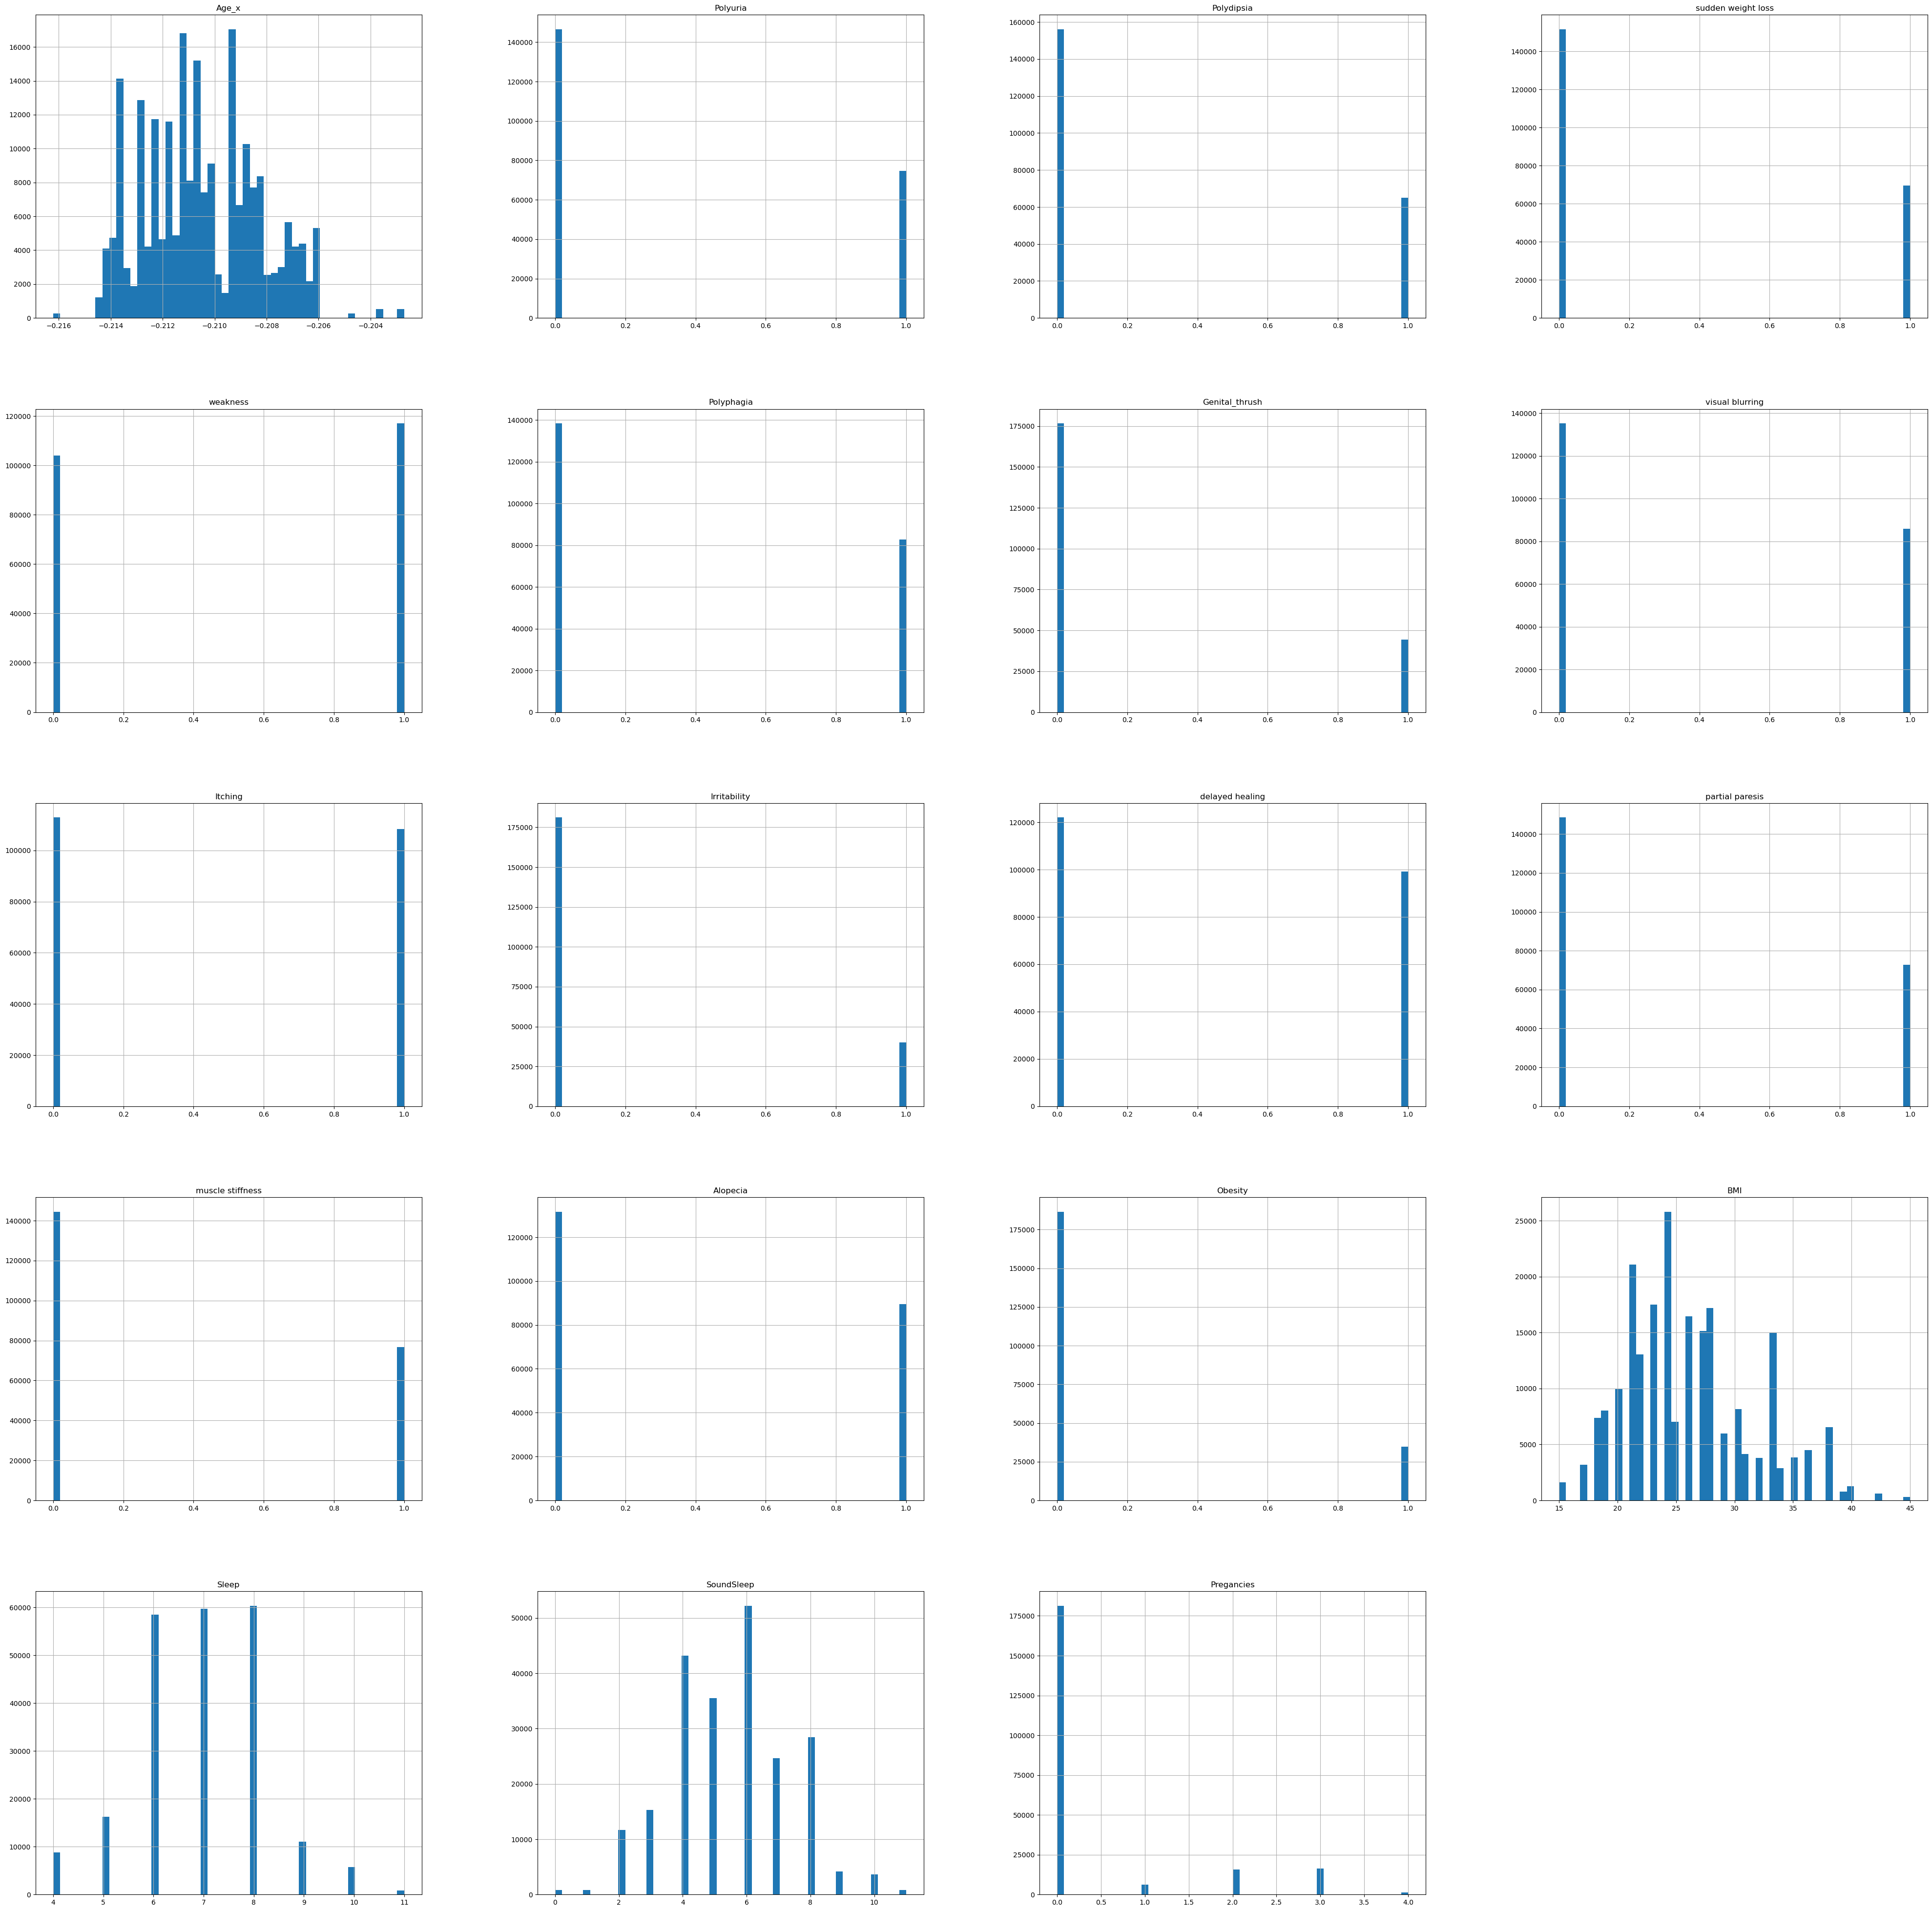

In [32]:
df.hist(figsize=(50,50),bins=50)

In [33]:
df=df[df.Age_x<=80] [df.Genital_thrush<=2] [df.Irritability<=2] [df.Obesity<=2] [df.BMI<=38] [df.Pregancies<=1]
df

,Age_x,Gender_x,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital_thrush,visual blurring,Itching,...,Gender_y,BPLevel,Family_Diabetes,UriationFreq,Smoking,JunkFood,Stress,Age_y,Pdiabetes,class
0,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,2,0,0,0,0,1,1,0,1
4,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,2,0,0,0,0,0,3,0,1
5,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,1,1,0,0,0,0,3,0,1
7,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,2,0,0,0,0,1,2,0,1
8,-0.211833,Male,0,1,0,1,0,0,0,1,...,1,2,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221195,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,1,0,0
221196,-0.211468,Male,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
221197,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,0
221198,-0.211468,Male,0,0,0,0,0,0,0,0,...,1,2,0,0,0,0,1,3,0,0


In [34]:
# Selecting features
X = df.iloc[:, 32].values
X=np.asarray(X).astype(np.float32)

y = df.iloc[:, 33].values
y=np.asarray(y).astype(np.float32)


# Sigmoid activation function

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Quick sanity check with the shapes of Training and Testing dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(130144,)
(130144,)
(55776,)
(55776,)


In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
model = Sequential()

In [38]:
model.add(Dense(input_dim = 1, units = 10, activation='relu', kernel_initializer='uniform'))

In [39]:
model.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))

In [40]:
model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history=model.fit(X_train,y_train,batch_size=50, epochs=20, validation_split=0.2)


Epoch 1/20
2083/2083 [==============================] - 8s 3ms/step - loss: 0.6441 - accuracy: 0.6611 - val_loss: 0.6406 - val_accuracy: 0.6606
Epoch 2/20
2083/2083 [==============================] - 6s 3ms/step - loss: 0.6402 - accuracy: 0.6611 - val_loss: 0.6402 - val_accuracy: 0.6606
Epoch 3/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6401 - accuracy: 0.6614 - val_loss: 0.6401 - val_accuracy: 0.6615
Epoch 4/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6401 - accuracy: 0.6615 - val_loss: 0.6401 - val_accuracy: 0.6615
Epoch 5/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6400 - accuracy: 0.6615 - val_loss: 0.6401 - val_accuracy: 0.6615
Epoch 6/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6401 - accuracy: 0.6615 - val_loss: 0.6401 - val_accuracy: 0.6615
Epoch 7/20
2083/2083 [==============================] - 6s 3ms/step - loss: 0.6400 - accuracy: 0.6615 - val_loss: 0.6401 - val_accuracy:

In [43]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

1743/1743 [==============================] - 5s 2ms/step


Text(0.5, 23.52222222222222, 'Predicted label')

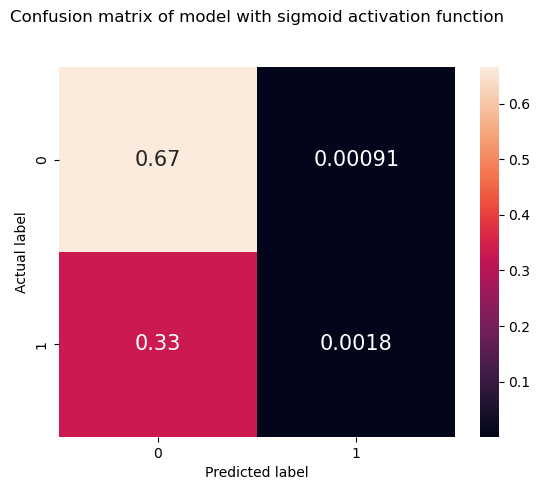

In [44]:
# confusion matrix

cf_matrix = confusion_matrix(y_test, y_pred)

p = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15})
plt.title('Confusion matrix of model with sigmoid activation function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


#### cm[0][0] = TP
#### cm[1][1] = TN
#### cm[0][1] = FP
#### cm[1][0] = FN

In [45]:
# xtract these counts using the function ravel():

true_pos, false_pos, false_neg, true_neg = cf_matrix.ravel()

true_pos, false_pos, false_neg, true_neg

(37127, 51, 18498, 100)

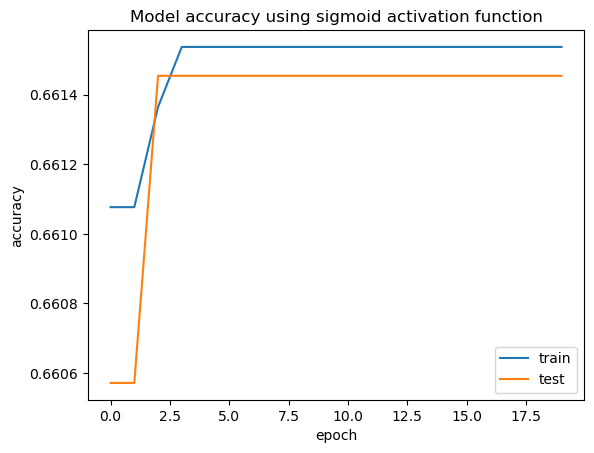

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy using sigmoid activation function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

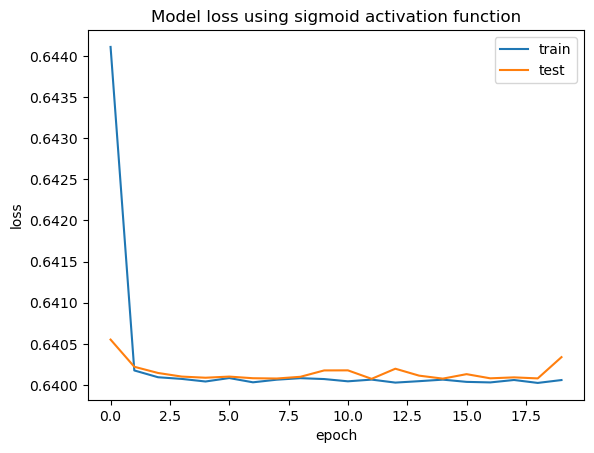

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss using sigmoid activation function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

## Linear Activation function

In [48]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Quick sanity check with the shapes of Training and Testing dataset
print(X_train_1.shape)
print(y_train_1.shape)
print(X_test_1.shape)
print(y_test_1.shape)

(130144,)
(130144,)
(55776,)
(55776,)


In [49]:
model1 = Sequential()
model1.add(Dense(input_dim = 1, units = 10, activation='relu', kernel_initializer='uniform'))
model1.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model1.add(Dense(units = 1, activation='linear', kernel_initializer='uniform'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1=model1.fit(X_train_1,y_train_1,batch_size=50, epochs=20, validation_split=0.2)

Epoch 1/20
2083/2083 [==============================] - 9s 4ms/step - loss: 0.7276 - accuracy: 0.6611 - val_loss: 0.6403 - val_accuracy: 0.6606
Epoch 2/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6403 - accuracy: 0.6611 - val_loss: 0.6402 - val_accuracy: 0.6606
Epoch 3/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.6615 - val_loss: 0.6405 - val_accuracy: 0.6615
Epoch 4/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6403 - accuracy: 0.6615 - val_loss: 0.6402 - val_accuracy: 0.6615
Epoch 5/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.6615 - val_loss: 0.6403 - val_accuracy: 0.6615
Epoch 6/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6403 - accuracy: 0.6615 - val_loss: 0.6402 - val_accuracy: 0.6615
Epoch 7/20
2083/2083 [==============================] - 7s 3ms/step - loss: 0.6403 - accuracy: 0.6615 - val_loss: 0.6403 - val_accuracy:

In [50]:
# Predicting the test set results
y_pred_1 = model.predict(X_test_1)
y_pred_1 = (y_pred_1 > 0.5)

1743/1743 [==============================] - 4s 2ms/step


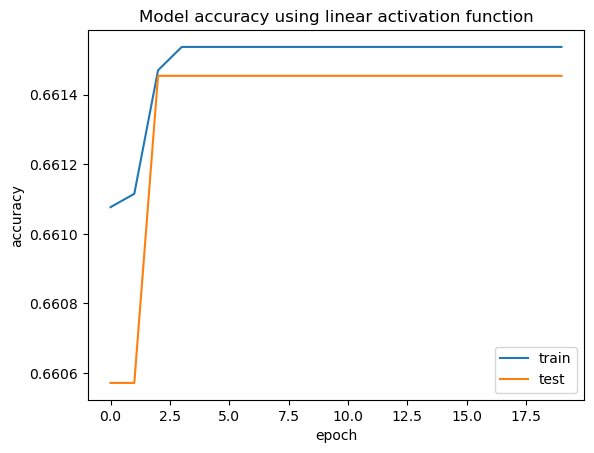

In [51]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy using linear activation function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

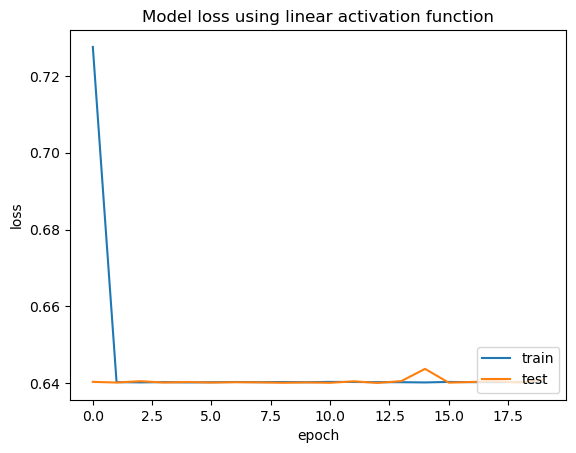

In [52]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss using linear activation function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

Text(0.5, 23.52222222222222, 'Predicted label')

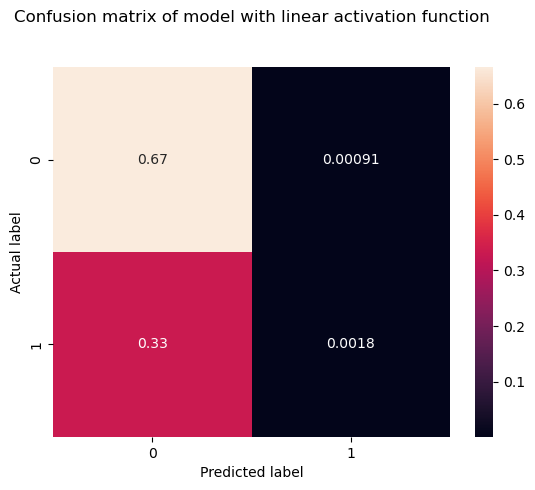

In [53]:
# confusion matrix

cf_matrix_1 = confusion_matrix(y_test_1, y_pred_1)

p = sns.heatmap(cf_matrix_1/np.sum(cf_matrix_1), annot = True, annot_kws = {'size':10})
plt.title('Confusion matrix of model with linear activation function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [54]:
# xtract these counts using the function ravel():

true_pos, false_pos, false_neg, true_neg = cf_matrix_1.ravel()

true_pos, false_pos, false_neg, true_neg

(37127, 51, 18498, 100)

# tanh activation function

In [55]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Quick sanity check with the shapes of Training and Testing dataset
print(X_train_2.shape)
print(y_train_2.shape)
print(X_test_2.shape)
print(y_test_2.shape)

(130144,)
(130144,)
(55776,)
(55776,)


In [56]:
model2 = Sequential()
model2.add(Dense(input_dim = 1, units = 10, activation='relu', kernel_initializer='uniform'))
model2.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model2.add(Dense(units = 1, activation='tanh', kernel_initializer='uniform'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2=model2.fit(X_train_2,y_train_2,batch_size=50, epochs=20, validation_split=0.2)

Epoch 1/20
2083/2083 [==============================] - 9s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy: 0.6606
Epoch 2/20
2083/2083 [==============================] - 7s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy: 0.6606
Epoch 3/20
2083/2083 [==============================] - 7s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy: 0.6606
Epoch 4/20
2083/2083 [==============================] - 7s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy: 0.6606
Epoch 5/20
2083/2083 [==============================] - 7s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy: 0.6606
Epoch 6/20
2083/2083 [==============================] - 7s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy: 0.6606
Epoch 7/20
2083/2083 [==============================] - 7s 3ms/step - loss: 5.2279 - accuracy: 0.6611 - val_loss: 5.2357 - val_accuracy:

In [57]:
# Predicting the test set results
y_pred_2 = model.predict(X_test_2)
y_pred_2 = (y_pred_2 > 0.5)

1743/1743 [==============================] - 4s 2ms/step


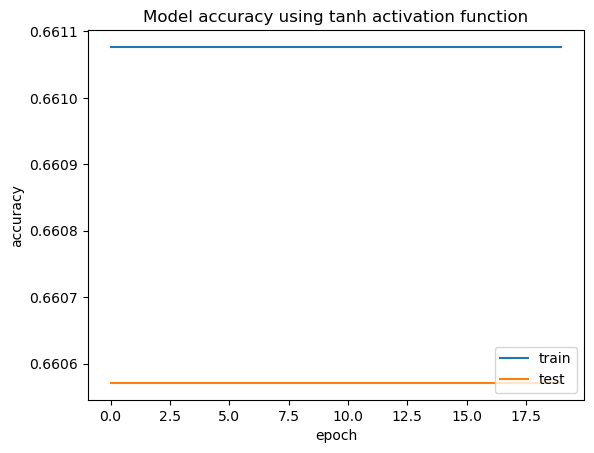

In [58]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy using tanh activation function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

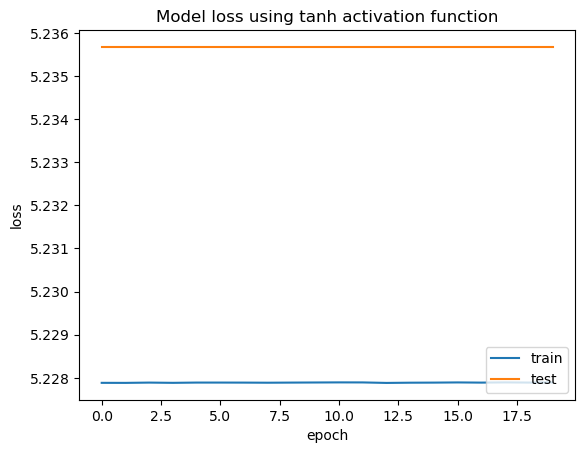

In [59]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss using tanh activation function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

Text(0.5, 23.52222222222222, 'Predicted label')

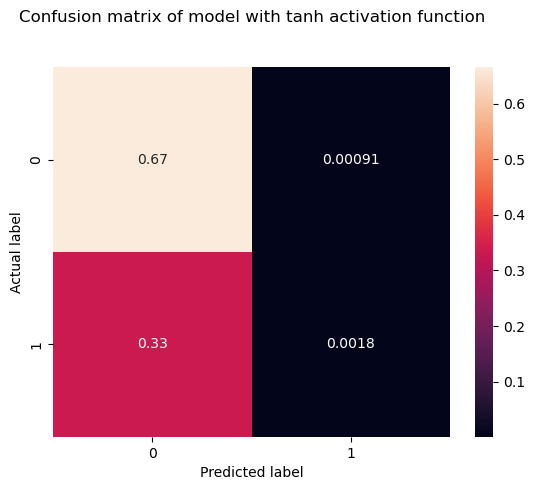

In [60]:
# confusion matrix

cf_matrix_2 = confusion_matrix(y_test_2, y_pred_2)

p = sns.heatmap(cf_matrix_2/np.sum(cf_matrix_2), annot = True, annot_kws = {'size':10})
plt.title('Confusion matrix of model with tanh activation function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [61]:
# xtract these counts using the function ravel():

true_pos, false_pos, false_neg, true_neg = cf_matrix_2.ravel()

true_pos, false_pos, false_neg, true_neg

(37127, 51, 18498, 100)

# Softmax activation function

In [62]:
from sklearn.model_selection import train_test_split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Quick sanity check with the shapes of Training and Testing dataset
print(X_train_3.shape)
print(y_train_3.shape)
print(X_test_3.shape)
print(y_test_3.shape)

(130144,)
(130144,)
(55776,)
(55776,)


In [63]:
# softmax activation function

model3 = Sequential()
model3.add(Dense(input_dim = 1, units = 10, activation='relu', kernel_initializer='uniform'))
model3.add(Dense(units = 10, activation='relu', kernel_initializer='uniform'))
model3.add(Dense(units = 1, activation='softmax', kernel_initializer='uniform'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3=model3.fit(X_train_3,y_train_3,batch_size=50, epochs=20, validation_split=0.1)

Epoch 1/20
2343/2343 [==============================] - 9s 3ms/step - loss: 0.6471 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy: 0.3418
Epoch 2/20
2343/2343 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy: 0.3418
Epoch 3/20
2343/2343 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy: 0.3418
Epoch 4/20
2343/2343 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy: 0.3418
Epoch 5/20
2343/2343 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy: 0.3418
Epoch 6/20
2343/2343 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy: 0.3418
Epoch 7/20
2343/2343 [==============================] - 7s 3ms/step - loss: 0.6402 - accuracy: 0.3387 - val_loss: 0.6422 - val_accuracy:

In [64]:
# Predicting the test set results
y_pred_3 = model.predict(X_test_3)
y_pred_3 = (y_pred_3 > 0.5)

1743/1743 [==============================] - 4s 2ms/step


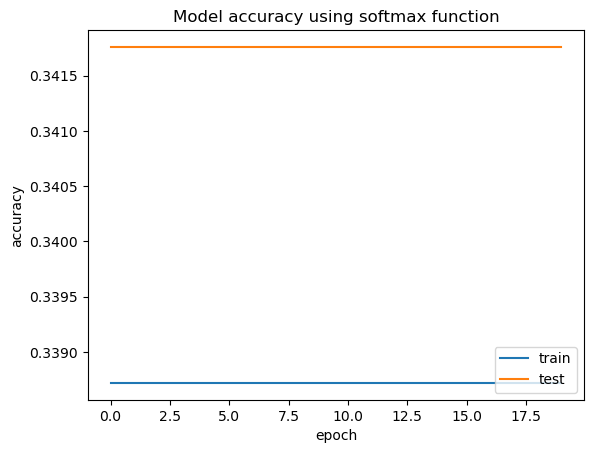

In [65]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy using softmax function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

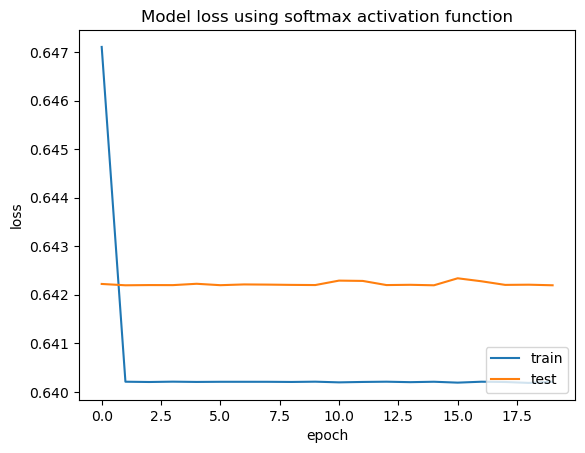

In [66]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss using softmax activation function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

Text(0.5, 23.52222222222222, 'Predicted label')

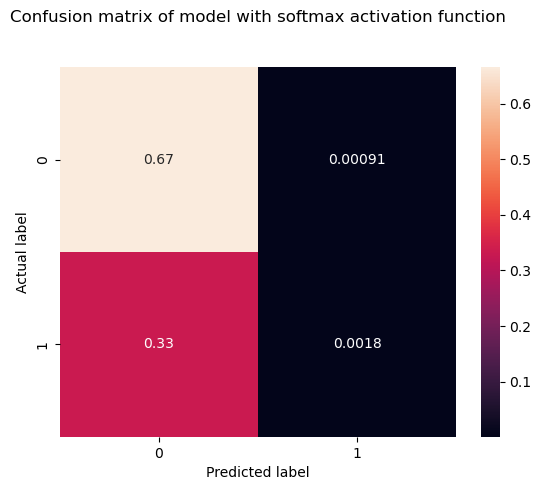

In [67]:
# confusion matrix

cf_matrix_3 = confusion_matrix(y_test_3, y_pred_3)

p = sns.heatmap(cf_matrix_3/np.sum(cf_matrix_3), annot = True, annot_kws = {'size':10})
plt.title('Confusion matrix of model with softmax activation function', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [68]:
# xtract these counts using the function ravel():

true_pos, false_pos, false_neg, true_neg = cf_matrix_3.ravel()

true_pos, false_pos, false_neg, true_neg

(37127, 51, 18498, 100)

# Overall accuracy presentation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


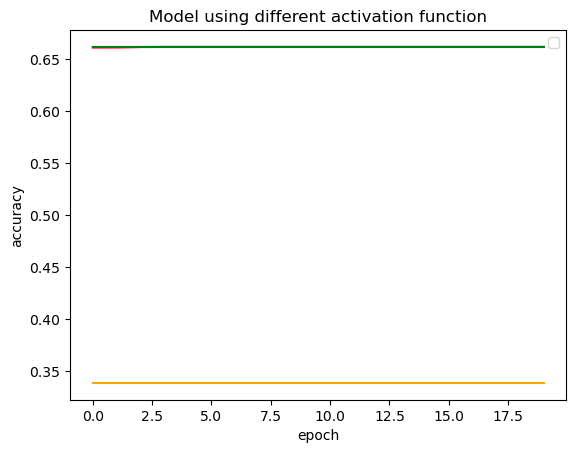

In [69]:
plt.plot(history.history['accuracy'],'violet')
plt.plot(history1.history['accuracy'],'red')
plt.plot(history2.history['accuracy'],'green')
plt.plot(history3.history['accuracy'],'orange')



plt.title('Model using different activation function')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

# END